### PIMA 인디언 당뇨병 예측

#### 데이터 설명

#### Pregnancies : 임신횟수
#### Glucose : 포도당 부하 검사 수치
#### BloodPressure : 혈압
#### SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
#### Insulin : 혈당 인슐린
#### BMI : 체질량지수
#### Diabetes Pedigree Function : 당뇨 내력 가중치 값
#### Age
#### Outcome : 클래스 결정, 당뇨 유무

In [2]:
import pandas as pd

PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


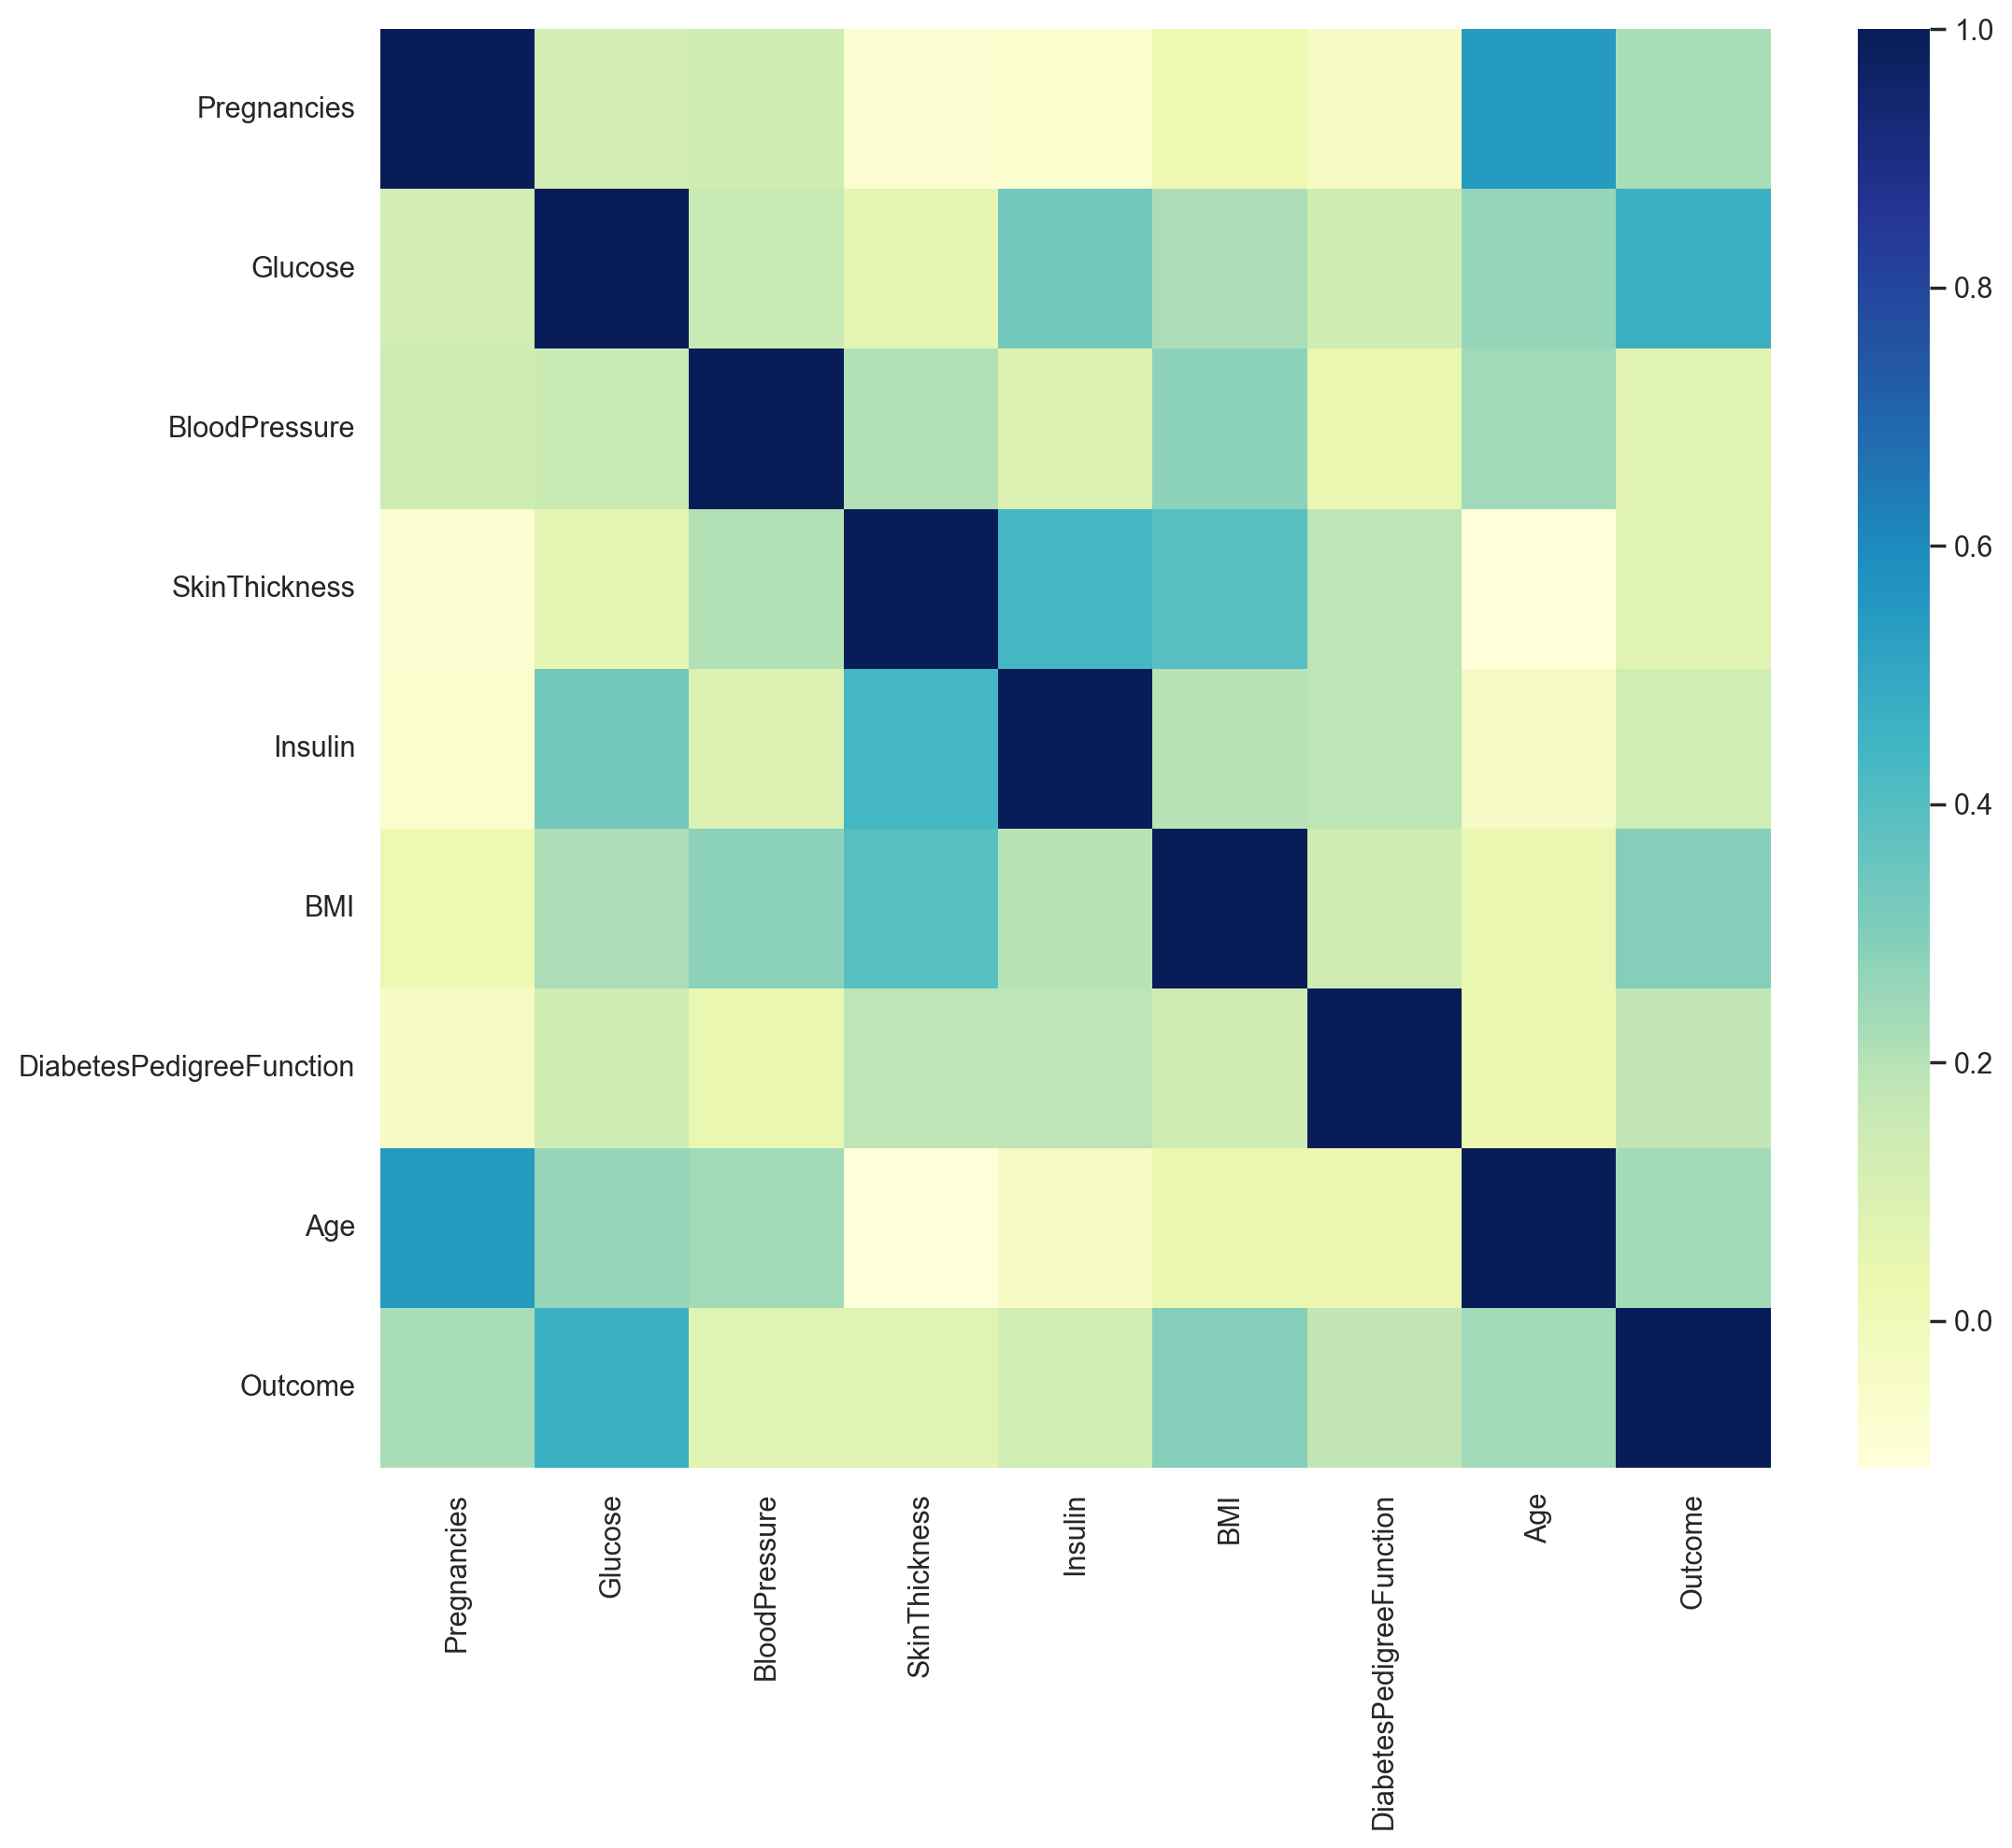

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu')
plt.show()

In [8]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
### 의학적 지식과 인디언에 대한 정보가 없으므로 0을 평균값으로 대체한다

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X = PIMA.drop(['Outcome'], axis=1)
y = PIMA['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('scaler' , StandardScaler()),
              ('model' , LogisticRegression(solver='liblinear', random_state=13))]
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [15]:
from sklearn.metrics import (accuracy_score, 
                             recall_score, 
                             precision_score, 
                             roc_auc_score, 
                             f1_score)

In [18]:
print('accuracy_score : ', accuracy_score(y_test, pred))
print('recall_score : ', recall_score(y_test, pred))
print('precision_score : ', precision_score(y_test, pred))
print('f1_score : ', f1_score(y_test, pred))

accuracy_score :  0.7792207792207793
recall_score :  0.543859649122807
precision_score :  0.7948717948717948
f1_score :  0.6458333333333333


In [19]:
coeff = list(pipe_lr['model'].coef_[0])
labels = list(X_train.columns)

In [24]:
### 다변수 방적식의 각 계수값을 확인할 수 있다.

coeff

[0.39798870985647794,
 1.2168751148934276,
 -0.11539565756635473,
 -0.0742685980948211,
 -0.20573136787564145,
 0.6512557265811167,
 0.32743228715480754,
 0.11034841808007162]

In [25]:
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

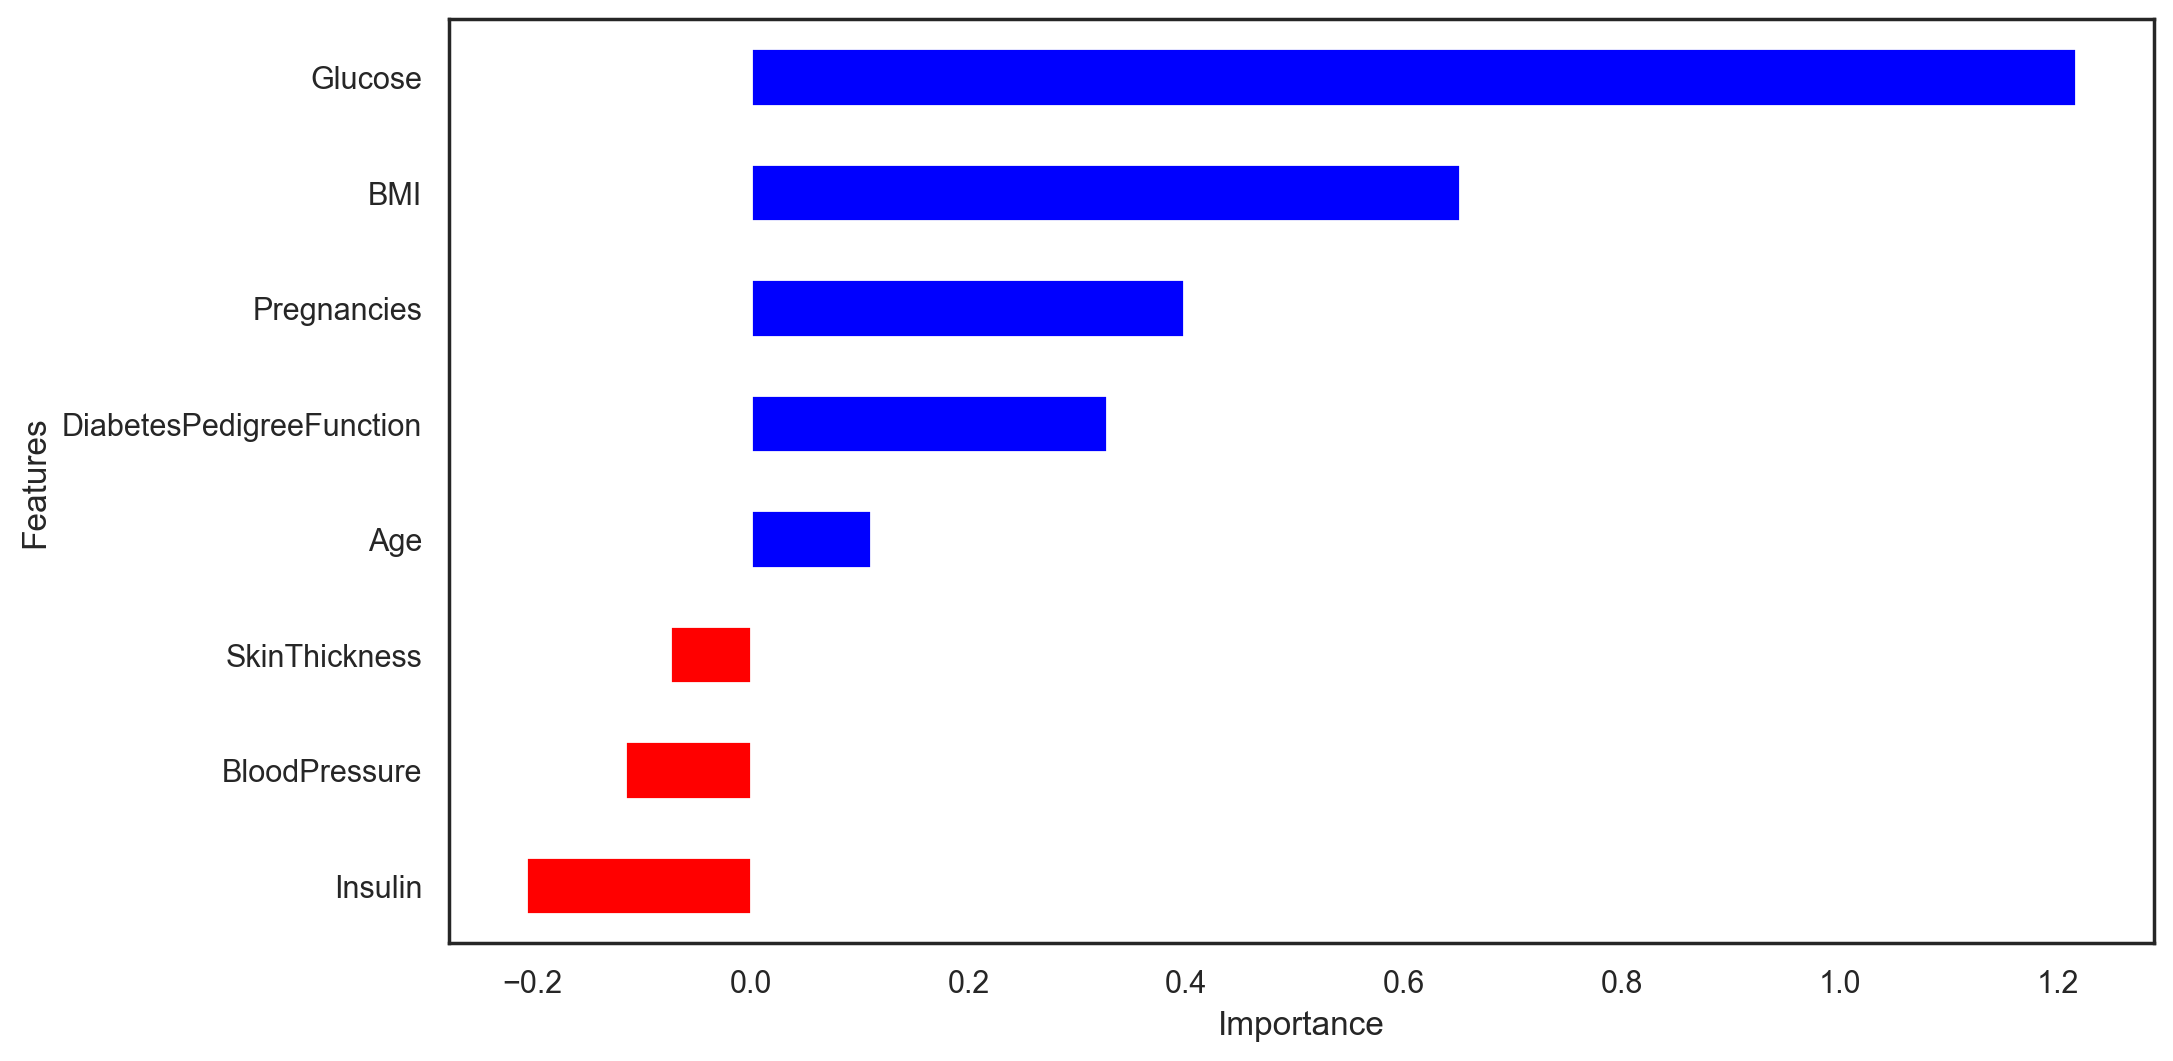

In [26]:
features = pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh',
                           figsize=(11,6),
                           color=features['positive'].map({True:'blue',
                                                          False:'red'}))

plt.xlabel('Importance')
plt.show()